<a href="https://colab.research.google.com/github/KayKozaronek/03_Courses/blob/master/ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upload Data 

In [122]:
# upload 'legislators-historical.csv' to the VM on which Colab runs

from google.colab import files 

files.upload()

{}

In [0]:
# load the uploaded CSV into a pandas data frame

import pandas as pd

leg = pd.read_csv("Kay Kozaronek - legislators-historical.csv",
                  usecols=["first_name", "gender", "type", "state",
                           "party", "birthday", "last_name"])

In [124]:
leg.head()

,last_name,first_name,birthday,gender,type,state,party
0,Bassett,Richard,1745-04-02,M,sen,DE,Anti-Administration
1,Bland,Theodorick,1742-03-21,M,rep,VA,NaN
2,Burke,Aedanus,1743-06-16,M,rep,SC,NaN
3,Carroll,Daniel,1730-07-22,M,rep,MD,NaN
4,Clymer,George,1739-03-16,M,rep,PA,NaN


# Data Exploration and Wide transformations

Apply takes a function name or a lambda expression that operatses on a subtable

In [125]:
leg.groupby("state").apply(lambda df: df.shape[0]).head(3)

state
AK     16
AL    206
AR    117
dtype: int64

#Homework

## Exercise 2.1:

Show the number of states with at least 10 female senators

In [126]:
leg.head(2)

,last_name,first_name,birthday,gender,type,state,party
0,Bassett,Richard,1745-04-02,M,sen,DE,Anti-Administration
1,Bland,Theodorick,1742-03-21,M,rep,VA,NaN


In [127]:
leg.groupby("state").apply(lambda df: df["gender"] == "F")

state       
AK     6619     False
       6647     False
       7442     False
       7501     False
       8039     False
                ...  
WY     10860    False
       10978    False
       11464     True
       11518    False
       11835     True
Name: gender, Length: 11975, dtype: bool

First we create a function that will act on a subtable of rows for a specific state

In [0]:
def get_number_of_female_senators(subtable):
  return subtable[subtable["gender"] == "F"].shape[0]

We can test this function on the subtable for California

In [129]:
ca_subtable = leg.groupby("state").get_group("CA")
ca_subtable.head(3)

,last_name,first_name,birthday,gender,type,state,party
2650,Gilbert,Edward,NaN,M,rep,CA,Democrat
2742,Wright,George,1816-06-04,M,rep,CA,Independent
2747,Frémont,John,1813-01-21,M,sen,CA,Democrat


In [130]:
ca_subtable["gender"].head()

2650    M
2742    M
2747    M
2830    M
2832    M
Name: gender, dtype: object

In [131]:
ca_subtable[ca_subtable["gender"] == "F"].head()

,last_name,first_name,birthday,gender,type,state,party
7733,Nolan,Mae,1886-09-20,F,rep,CA,Republican
8446,Kahn,Florence,1866-11-09,F,rep,CA,Republican
9228,Douglas,Helen,1900-11-25,F,rep,CA,Democrat
10398,Burke,Yvonne,1932-10-05,F,rep,CA,Democrat
10443,Pettis,Shirley,1924-07-12,F,rep,CA,Republican


In [132]:
ca_subtable[ca_subtable["gender"] == "F"].shape

(23, 7)

In [133]:
ca_subtable[ca_subtable["gender"]== "F"].shape[0]

23

In [134]:
get_number_of_female_senators(ca_subtable)

23

Now we can apply the function to each group subtable

In [135]:
num_females_by_state = leg.groupby("state").apply(get_number_of_female_senators)

num_females_by_state.head(3)

state
AK    0
AL    3
AR    5
dtype: int64

Lasty, let's filter out the states with less than 10 senators

In [136]:
num_females_by_state[num_females_by_state >= 10]

state
CA    23
FL    12
IL    13
NY    20
dtype: int64

## Exercise 2.2:

Count the average number of senators per state with missing party ("NaN")

In [137]:
leg.head(1)

,last_name,first_name,birthday,gender,type,state,party
0,Bassett,Richard,1745-04-02,M,sen,DE,Anti-Administration


In [138]:
leg.groupby("state").apply(lambda subtable: subtable["party"].isna().sum()).mean()

4.0344827586206895

Let's deconstruct this 

In [139]:
leg.groupby("state")

In [140]:
leg.groupby("state").apply(lambda subtable: subtable["party"])

state       
AK     6619        Democrat
       6647     Independent
       7442             NaN
       7501             NaN
       8039      Republican
                   ...     
WY     10860     Republican
       10978     Republican
       11464     Republican
       11518     Republican
       11835     Republican
Name: party, Length: 11975, dtype: object

In [141]:
leg.groupby("state").apply(lambda subtable: subtable["party"].isna())

state       
AK     6619     False
       6647     False
       7442      True
       7501      True
       8039     False
                ...  
WY     10860    False
       10978    False
       11464    False
       11518    False
       11835    False
Name: party, Length: 11975, dtype: bool

In [142]:
leg.groupby("state").apply(lambda subtable: subtable["party"].isna().sum()).head()

state
AK    2
AL    0
AR    2
AS    0
AZ    0
dtype: int64

In [143]:
leg.groupby("state").apply(lambda subtable: subtable["party"].isna().sum()).mean()

4.0344827586206895

## Exercise 2.3: Show the states with less than 10 senators

### Option 1 

In [144]:
leg.groupby("state").apply(lambda subtable: subtable.shape[0]).head()

state
AK     16
AL    206
AR    117
AS      2
AZ     48
dtype: int64

In [145]:
senator_count1 = leg.groupby("state").apply(lambda subtable: subtable.shape[0])
senator_count1[senator_count1 <10]

state
AS    2
DC    2
DK    9
GU    4
OL    2
VI    4
dtype: int64

### Option 2

In [146]:
leg.groupby("state").count().head()

,last_name,first_name,birthday,gender,type,party
state,,,,,,
AK,16,16,16,16,16,14
AL,206,206,197,206,206,206
AR,117,117,114,117,117,115
AS,2,2,2,2,2,2
AZ,48,48,48,48,48,48


In [147]:
leg.groupby("state")["state"].count().head()

state
AK     16
AL    206
AR    117
AS      2
AZ     48
Name: state, dtype: int64

In [148]:
senator_count = leg.groupby("state")["state"].count()
senator_count[senator_count <10]

state
AS    2
DC    2
DK    9
GU    4
OL    2
VI    4
Name: state, dtype: int64

# Exploratory and inferential statistics 

In [149]:
# upload 'legislators-historical.csv' to the VM on which Colab runs

from google.colab import files 

files.upload()

{}

In [0]:
lib = pd.read_csv("libido.csv")

Each row corresponds to a person. 

Each column corresponds to:
- age group (18-30, 30-45, 45-60) (independent variable, IV)
- a drug dose (IV)
- the measured libido (outcome / dependent variable, DV)

In [151]:
lib.sample(4)

,age_group,dose,libido
9,45-65,2,3
1,30-45,1,2
0,18-30,1,3
12,45-65,3,5


Let's change the dose value from numeric to a string for conveneice 

In [152]:
lib["dose"].replace({1: "placebo",
                     2: "low",
                     3: "high"},
                    inplace = True)

lib.sample(5)

,age_group,dose,libido
8,18-30,low,2
14,18-30,high,6
6,18-30,low,2
2,30-45,placebo,1
11,45-65,high,4


In [153]:
lib["dose"] == "placebo"

0      True
1      True
2      True
3      True
4      True
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
Name: dose, dtype: bool

## Histogram
Create a histogram of the doses to see their distirbution 

This shows that the group sizes are equal

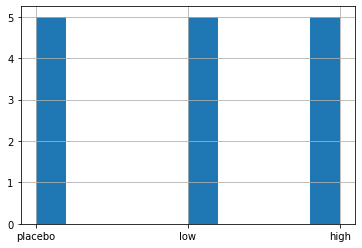

In [154]:
lib["dose"].hist()

## Boxplot 

Let's create a box plot (aka box-and-whisker plot) of libido vs. dose 

Each box shows us :
- the 1st quartile (lower bound) 
- median (line within the box)and 
- 3rd quartile (upper bound) of the data

The wiskers include all points within 1.5 times the inter-quartile range (IQR)

As seen in the boxplots bellow, we do not have many outliers.

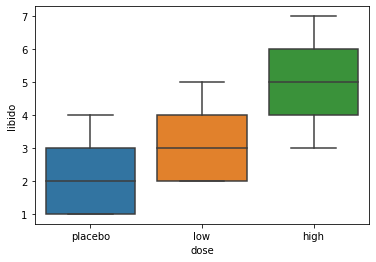

In [155]:
import seaborn as sns

sns.boxplot(data=lib, x="dose", y="libido");

## Two-sample t-test

In [156]:
lib.sample(10)

,age_group,dose,libido
10,45-65,high,7
0,18-30,placebo,3
14,18-30,high,6
13,18-30,high,3
2,30-45,placebo,1
4,18-30,placebo,4
11,45-65,high,4
7,18-30,low,4
9,45-65,low,3
5,45-65,low,5


Before we get to ANOVA, we'll do a t-test of placebo vs. andy dose 

We can create a new column named "placebo" for this 

In [157]:
lib["placebo"] = lib["dose"] == "placebo"
lib.head()

,age_group,dose,libido,placebo
0,18-30,placebo,3,True
1,30-45,placebo,2,True
2,30-45,placebo,1,True
3,30-45,placebo,1,True
4,18-30,placebo,4,True


Let's do the t-test now

Null Hypothesis (H0): 
- The average libido is the same in the placebo/ non-placebo group

Alternative Hypothesis (H1):
- The averages are different

In [158]:
from scipy.stats import ttest_ind
ttest_ind(lib.loc[lib["dose"] == "placebo", "libido"],
          lib.loc[lib["dose"] != "placebo", "libido"])

Ttest_indResult(statistic=-2.221442204498801, pvalue=0.04469997916031026)

The second attribute "pvalue" is below 0.05 which means that if the averages were the same (drug has no effect), results (a dataset) as extreme as this is unlikely (less than 5% probable)

This alone does NOT tell us that the drug causes a higher/ lower libido (We can infer that from the study design though)

Here's another way of performing the t-test

In [159]:
ttest_ind(lib.loc[lib["placebo"], "libido"], lib.loc[~lib["placebo"], "libido"])

Ttest_indResult(statistic=-2.221442204498801, pvalue=0.04469997916031026)

Side note: the assumptions for a t test are:

- one discrete (categorial) independent variable with two levels (check - we used 'placebo')
- one continuous (metric) dependent variable (check - we used 'libido')
- independent samples (check - each person appears in one or the other group not both)
- the dependent variable is normally distributed within each group (we didn't check but could have used the `Shapiro-Wilks test` or a `Q-Q plot`)
- homoscedasticity: variances are equal within each group (we didn't check but could have used `Levene's test` for equality)

If the variances are unequal, we could have used `Welch's t-test`:

In [160]:
ttest_ind(lib.loc[lib["placebo"], "libido"],
          lib.loc[~lib["placebo"], "libido"], 
          equal_var = False)

Ttest_indResult(statistic=-2.4195152518746497, pvalue=0.0357190765601339)

# One-way ANOVA

We'll use the original levels of the variable 'dose' for this.

We'll use the library scipy for our ANOVA

In [161]:
import scipy.stats as stats

stats.f_oneway(lib["libido"][lib["dose"] == "high"],
               lib["libido"][lib["dose"] == "low"],
               lib["libido"][lib["dose"] == "placebo"])

F_onewayResult(statistic=5.11864406779661, pvalue=0.024694289538222603)

The p-value is less than 5%, indicating that there is a significant difference in means between at least two groups; 

i.e. dose has some effect on libido, although it is not clear in what way exactly:
- is there a significant increase / decrease from low dose to high dose?
- or from placebo to low dose? 

To get an answer to these questions we would have to use a `post hoc test` 
(most commonly `Tukey's test for pairwise differences`)

As an alternative to scipy, we can do an ANOVA using statsmodels

This gives us much more information ad does additional tests on the model assumptions 

`Prob (F-statistic)` is the p-value and less than 5% means that it is => significant

In [162]:
from statsmodels.formula.api import ols

results = ols("libido ~ C(dose)", data=lib).fit()
results.summary()

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 libido   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     5.119
Date:                Tue, 19 May 2020   Prob (F-statistic):             0.0247
Time:                        20:49:13   Log-Likelihood:                -24.683
No. Observations:                  15   AIC:                             55.37
Df Residuals:                      12   BIC:                             57.49
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.0000      0.627      7.972      0.000       3.634       6.366
C(dose)[T.low]        -1.8000      0.887     -2.029      0.065      -3.732       0.132
C(dose)[T.placebo]    -2.8000      0.887     -3.157      0.008      -4.732      -0.868
==============================================================================
Omnibus:                        2.517   Durbin-Watson:                   2.408
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                1.108
Skew:                           0.195   Prob(JB):                        0.575
Kurtosis:                       1.727   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

To get more information, we can take a look at the ANOVA table:
- the column gives us the `variance explained by the variable dose (20.133)`
- and the `unsystematic variance (23.6)` that cannot be explained by dose, 
- i.e. due to individual differences or other factors

`In total we can explain about 40% of the total variance: R^2 = 20.133 / (20.133 + 23.6)`

In [163]:
import statsmodels.api as sm

aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(dose),20.133333,2.0,5.118644,0.024694
Residual,23.600000,12.0,NaN,NaN


# Two-way ANOVA
for a two-way ANOVA we use a model that includes `two IVs, dose and age group`

- the result shows that there is no significant difference between groups;
- this is because the ANOVA has to account for false positives which are more common the more IVs and levels are in the data

In [164]:
lib.head()

,age_group,dose,libido,placebo
0,18-30,placebo,3,True
1,30-45,placebo,2,True
2,30-45,placebo,1,True
3,30-45,placebo,1,True
4,18-30,placebo,4,True


In [165]:
ols("libido ~C(dose)*C(age_group)", lib). fit().summary()

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 libido   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     3.448
Date:                Tue, 19 May 2020   Prob (F-statistic):             0.0513
Time:                        20:49:13   Log-Likelihood:                -21.284
No. Observations:                  15   AIC:                             54.57
Df Residuals:                       9   BIC:                             58.82
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    4.5000      0.913      4.930      0.001       2.435       6.565
C(dose)[T.low]                              -1.8333      1.179     -1.556      0.154      -4.499       0.833
C(dose)[T.placebo]                          -1.0000      1.291     -0.775      0.458      -3.920       1.920
C(age_group)[T.30-45]                       -1.0833      0.589     -1.838      0.099      -2.416       0.250
C(age_group)[T.45-65]                        0.8333      1.179      0.707      0.497      -1.833       3.499
C(dose)[T.low]:C(age_group)[T.30-45]      4.187e-16   1.66e-16      2.530      0.032    4.43e-17    7.93e-16
C(dose)[T.placebo]:C(age_group)[T.30-45]    -1.0833      0.589     -1.838      0.099      -2.416       0.250
C(dose)[T.low]:C(age_group)[T.45-65]         0.5000      1.667      0.300      0.771      -3.270       4.270
C(dose)[T.placebo]:C(age_group)[T.45-65]          0          0        nan        nan           0           0
==============================================================================
Omnibus:                        2.149   Durbin-Watson:                   2.778
Prob(Omnibus):                  0.341   Jarque-Bera (JB):                1.106
Skew:                           0.281   Prob(JB):                        0.575
Kurtosis:                       1.794   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Exercise: t-test, one-way and two-way ANOVA with different dataset

- Upload the `diets.csv` file
- Load data set: each row represents a person that followed one of
several diets for 6 weeks; 
- Other data includes age, gender, height and weight before and after 
were recorded

In [166]:
from google.colab import files

files.upload()

{}

In [167]:
diet = pd.read_csv("diets.csv")
diet.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3


## Task1:
Create a new column "weight_loss" which is the difference of pre weight and weight6weeks.

In [168]:
diet["weight_loss"] = diet["weight6weeks"] - diet["pre.weight"]
diet.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weight_loss
0,25,,41,171,60,2,60.0,0.0
1,26,,32,174,103,2,103.0,0.0
2,1,0,22,159,58,1,54.2,-3.8
3,2,0,46,192,60,1,54.0,-6.0
4,3,0,55,170,64,1,63.3,-0.7


## Task 2: 

Create a histogram for gender and another one for height

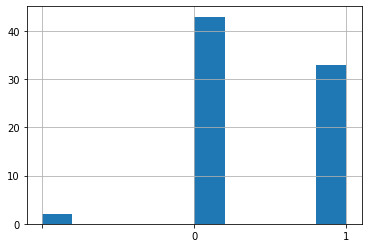

In [169]:
diet["gender"].hist()

Some data is missing, which we can see on the far left. 

Otherwise the groups are pretty even

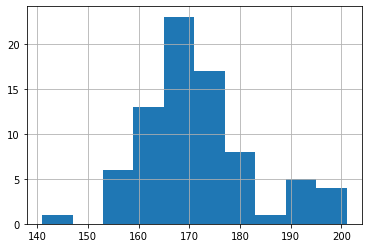

In [170]:
diet["Height"].hist()

height distribution is slightly skewed towards large values

##Task 3:
Create one box plot for weight loss by gender and one by diet


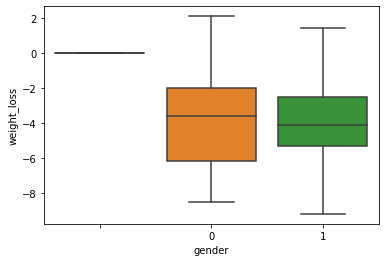

In [171]:
import seaborn as sns

sns.boxplot(data = diet, x="gender", y="weight_loss")

We see that gender does not seem to have an overall effect on weight loss; 

however the distribution is much wider for one gender than for the other one

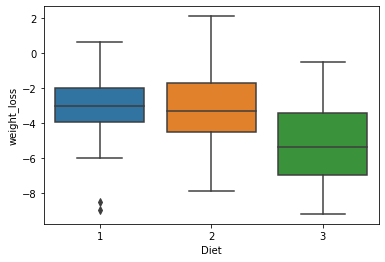

In [172]:
sns.boxplot(x="Diet", y = "weight_loss", data = diet)

we see that:
- there are some outliers for diet 1 (large weight gain after following the diet)
- diet 2 seems to lead to more weight loss than diet 3
- no systematic difference between diet 1 and 2

##Task 4: 
Do a one-way ANOVA for weight loss vs. diet

- the p-value of 0.3% shows that there is a significant difference in weight 
- loss between at least two of the groups

In [175]:
ols("weight_loss~C(Diet)", data = diet).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            weight_loss   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     6.197
Date:                Tue, 19 May 2020   Prob (F-statistic):            0.00323
Time:                        20:50:04   Log-Likelihood:                -177.27
No. Observations:                  78   AIC:                             360.5
Df Residuals:                      75   BIC:                             367.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.3000      0.489     -6.750      0.000      -4.274      -2.326
C(Diet)[T.2]     0.2741      0.672      0.408      0.684      -1.064       1.613
C(Diet)[T.3]    -1.8481      0.672     -2.751      0.007      -3.187      -0.510
==============================================================================
Omnibus:                        0.064   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.968   Jarque-Bera (JB):                0.230
Skew:                          -0.036   Prob(JB):                        0.891
Kurtosis:                       2.744   Cond. No.                         3.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Task 5:

Do a two-way ANOVA for weight loss vs. diet and gender
- the p-value is around 0.1% which shows there is a significant difference in 
- means when using two independent variables / factors as well

In [176]:
ols("weight_loss ~C(Diet)*C(gender)", data = diet).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            weight_loss   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     3.929
Date:                Tue, 19 May 2020   Prob (F-statistic):            0.00190
Time:                        20:50:18   Log-Likelihood:                -172.05
No. Observations:                  78   AIC:                             358.1
Df Residuals:                      71   BIC:                             374.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -1.1140      0.887     -1.255      0.213      -2.883       0.655
C(Diet)[T.2]                    1.1140      0.887      1.255      0.213      -0.655       2.883
C(Diet)[T.3]                   -1.1378      0.435     -2.615      0.011      -2.005      -0.270
C(gender)[T.0]                 -1.9360      0.956     -2.026      0.047      -3.842      -0.030
C(gender)[T.1]                 -2.5360      0.982     -2.583      0.012      -4.494      -0.578
C(Diet)[T.2]:C(gender)[T.0]    -0.6711      1.080     -0.621      0.536      -2.824       1.482
C(Diet)[T.3]:C(gender)[T.0]    -1.6922      0.658     -2.571      0.012      -3.005      -0.380
C(Diet)[T.2]:C(gender)[T.1]    -1.5731      1.134     -1.388      0.170      -3.834       0.688
C(Diet)[T.3]:C(gender)[T.1]     0.5544      0.716      0.774      0.442      -0.874       1.983
==============================================================================
Omnibus:                        1.632   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.442   Jarque-Bera (JB):                1.030
Skew:                          -0.065   Prob(JB):                        0.597
Kurtosis:                       3.548   Cond. No.                     2.07e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.4e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Homework

## Task 1:

Load the dataset and run a one-way ANOVA on it

We'll use the Iris dataset which can be loaded from seaborn like this

In [0]:
import seaborn as sns

iris = sns.load_dataset("iris")

These are measurements for flowers of different species. We're gonna see if the species is a good predictor for sepal_length.

In [178]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**TODO** Your task: Run an ANOVA with species as the IV and sepal_length as the DV. How do you interpret the results?


##Task 2: 
Using `anova_lm?` from the `statsmodels` package, print the variance explained by the model above and the residual variance. How much % of the total variance of the DV `sepal_length` can be explained by the IV `species`?

##Task 3: 
Transform the variable `petal_width` into a categorial variable `petal_width_cat` using the `qcut` function from the `pandas` package. Specifically, transform the petal width measurements into three distinct bins "low", "medium" and "high".

##Task 4
Run a two-way ANOVA on ```sepal_length``` (DV) using the independent variables ```species``` and ```petal_width_cat```. How do you interpret the results?

##Task 5 
(No coding, just text answer) What kind of test can you use after a two-way ANOVA to get more insight into the results? For instance, what kind of test can be used to say which of the variables ```species``` and ```petal_width_cat``` are good predictors?